# Basic preparations

In this Notebook, the geofabric for the province of QC and Maritimes, is extracted from the `MERIT-Basins` dataset.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import hydrant.topology.geom as gm

import subprocess
import os

Path definitions (system dependant - modify accordingly):

In [2]:
# geofabric paths
## merit-basins
mb_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
nc_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/coastal_hillslopes'
## provincial boundaries - downloaded from https://open.canada.ca/data/en/dataset/a883eb14-0c0e-45c4-b8c4-b54c4a819edb
pv_file = 'lpr_000b16a_e'
pv_path = f'/project/rpp-kshook/Model_Output/canadian_cartographic_boundary/{pv_file}.zip'


# output paths
pv_out = './qc-maritimes-boundaries/'
mb_out = './merit-basins-qc-maritimes-boundaries/'

Extracting AB boundary polygon

In [ ]:
subprocess.run(['unzip', pv_path, '-d', pv_out])

# Reading Geofabric Dataset

## AB boundaries

In [10]:
provinces = gpd.read_file(os.path.join(pv_out, pv_file+'.shp'))

In [11]:
provinces

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.640..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


In [15]:
# listing selected provinces for this study
sel_pr = ['Quebec', 'New Brunswick', 'Nova Scotia', 'Prince Edward Island']
# subsetting `provinces` variable
qc_maritimes = provinces.loc[provinces.PRENAME.isin(sel_pr)].copy().to_crs(epsg=4326)

In [16]:
qc_maritimes

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((-61.98301 46.45775, -61.98137 ..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((-61.90234 45.87878, -61.90057 ..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((-58.64702 51.20815, -58.63989 ..."


<AxesSubplot:>

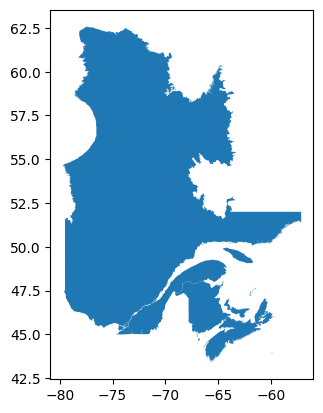

In [17]:
qc_maritimes.plot()

## MERIT-Basins layers

Upon **visual** inspection, only layer #72 has sub-basins and river reaches within the provincial boundary of Quebec and the Maritimes!

In [18]:
# file names
cat_files = ['cat_pfaf_72_MERIT_Hydro_v07_Basins_v01_bugfix1.shp']
riv_files = ['riv_pfaf_72_MERIT_Hydro_v07_Basins_v01_bugfix1.shp']
nca_files = ['hillslope_72_clean.shp']
# reading in data
cat = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in cat_files])
riv = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in riv_files])
nca = pd.concat([gpd.read_file(os.path.join(nc_path, f)) for f in nca_files])

In [19]:
cat.set_crs(epsg=4326, inplace=True)
nca.set_crs(epsg=4326, inplace=True)
riv.set_crs(epsg=4326, inplace=True)

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,72000001,4.861067,3.861534,1.258844,0.014094,133.939982,2,68.7,0.014094,0,2,72000030,72000743,0,0,"LINESTRING (-77.38833 62.52250, -77.38750 62.5..."
1,72000002,2.572272,2.348346,1.095355,0.075347,44.704273,1,194.3,0.075347,0,0,0,0,0,0,"LINESTRING (-77.57833 62.51167, -77.57750 62.5..."
2,72000003,1.400671,1.303608,1.074457,0.234509,27.418033,1,329.3,0.234509,0,0,0,0,0,0,"LINESTRING (-77.15417 62.50750, -77.15333 62.5..."
3,72000004,1.914408,1.621514,1.180630,0.004531,664.592208,3,8.7,0.004531,0,2,72000005,72000400,0,0,"LINESTRING (-77.61417 61.39667, -77.61333 61.3..."
4,72000005,2.905802,2.048938,1.418199,0.000618,624.169746,3,1.8,0.000618,72000004,2,72000006,72000264,0,0,"LINESTRING (-77.58917 61.40500, -77.58833 61.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59785,72059786,8.235011,6.125759,1.344325,0.008896,51.578512,1,73.3,0.008896,72057890,0,0,0,0,0,"LINESTRING (-81.56917 41.20250, -81.57000 41.2..."
59786,72059787,0.881055,0.648637,1.358317,0.000000,28.659389,1,0.0,0.000000,72058076,0,0,0,0,0,"LINESTRING (-84.77500 41.24333, -84.77417 41.2..."
59787,72059788,0.001115,0.001115,1.000000,0.000000,28.138533,1,0.0,0.000000,0,0,0,0,0,0,"LINESTRING (-72.38500 61.88750, -72.38500 61.8..."
59788,72059789,0.001111,0.001111,1.000000,10.799241,26.348979,1,0.0,0.000000,0,0,0,0,0,0,"LINESTRING (-55.38917 47.21667, -55.38917 47.2..."


# Preparing `cat`, `riv`, and `nca` objects for the region

## Preparing `catchments` and `rivers` from `MERIT-Basins`

In [20]:
catchments = gm.prepare_cat(cat=cat, cat_col_id='COMID', cst=nca, cst_col_mapper={'FID':'COMID'}, cst_col_id='COMID')

In [21]:
catchments

,COMID,unitarea,geometry,hillslope
0,72000001,29.794278,"POLYGON ((-77.38125 62.53042, -77.37458 62.530...",0
1,72000002,44.704273,"MULTIPOLYGON (((-77.48792 62.52958, -77.48542 ...",0
2,72000003,27.418033,"MULTIPOLYGON (((-77.11625 62.46708, -77.11542 ...",0
3,72000004,7.680571,"POLYGON ((-77.61292 61.40875, -77.60792 61.408...",0
4,72000005,6.563699,"POLYGON ((-77.55958 61.41292, -77.55292 61.412...",0
...,...,...,...,...
80877,72080878,0.065442,"POLYGON ((-81.09125 54.28875, -81.08958 54.288...",1
80878,72080879,0.095558,"POLYGON ((-81.12542 54.32708, -81.12208 54.327...",1
80879,72080880,0.005029,"POLYGON ((-81.12375 54.33042, -81.12292 54.330...",1
80880,72080881,0.010058,"POLYGON ((-81.12292 54.32958, -81.12208 54.329...",1


In [22]:
rivers = gm.prepare_riv(riv=riv, riv_cols={'id':'COMID', 'next_id':'NextDownID', 'slope':'slope', 'length':'lengthkm', 'length_direct':'lengthdir'}, cat=catchments, cat_cols={'id':'COMID', 'hillslope':'hillslope', 'geom':'geometry'})

In [23]:
rivers

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry,hillslope
0,72000001,4.861067,3.861534,1.258844,0.014094,133.939982,2,68.7,0.014094,0,2,72000030,72000743,0,0,"LINESTRING (-77.38833 62.52250, -77.38750 62.5...",0
1,72000002,2.572272,2.348346,1.095355,0.075347,44.704273,1,194.3,0.075347,0,0,0,0,0,0,"LINESTRING (-77.57833 62.51167, -77.57750 62.5...",0
2,72000003,1.400671,1.303608,1.074457,0.234509,27.418033,1,329.3,0.234509,0,0,0,0,0,0,"LINESTRING (-77.15417 62.50750, -77.15333 62.5...",0
3,72000004,1.914408,1.621514,1.180630,0.004531,664.592208,3,8.7,0.004531,0,2,72000005,72000400,0,0,"LINESTRING (-77.61417 61.39667, -77.61333 61.3...",0
4,72000005,2.905802,2.048938,1.418199,0.000618,624.169746,3,1.8,0.000618,72000004,2,72000006,72000264,0,0,"LINESTRING (-77.58917 61.40500, -77.58833 61.4...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80877,72080878,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
80878,72080879,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
80879,72080880,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
80880,72080881,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1


## Subsetting region's portion

In [27]:
region_catchments, region_rivers = gm.intersect_topology(cat=catchments, cat_cols={'id':'COMID'}, riv=rivers, riv_cols={'id':'COMID', 'next_id':'NextDownID'}, shapefile=qc_maritimes)

In [28]:
# saving data
region_catchments.to_file(os.path.join(mb_out, 'qc_maritimes_cat.shp'))
region_rivers.to_file(os.path.join(mb_out, 'qc_maritimes_riv.shp'))

## Vizualizing the outcome

<AxesSubplot:>

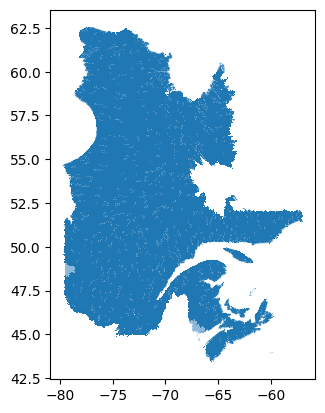

In [33]:
fig, ax = plt.subplots(1, 1)

qc_maritimes.plot(alpha=0.5, ax=ax)
region_rivers.plot(ax=ax)